In [1]:
import numpy as np
from keras.datasets import fashion_mnist as fmn
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import time
from matplotlib import pyplot as plt

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Problem 1
Experiment with fully connected neural nets for classification of the Fashion-MNIST data: add at least two more layers, make all hidden layers at least 20 neurons wide, and try it with both ReLU and sigmoid activations.  Train for as many epochs as you need until the loss function (categorical cross entropy) stops improving--Keras's `callbacks.EarlyStopping` may be useful.

In [2]:
(x_train, y_train), (x_test, y_test) = fmn.load_data()
#Flatten the inputs to Nx784 instead of Nx28x28
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [3]:
# convert to one-hot encoding
y_train2 = to_categorical(y_train, num_classes=10)
y_test2 = to_categorical(y_test, num_classes=10)

In [14]:
# build model with ReLU activation
relu = Sequential()
relu.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
relu.add(Dense(20, activation='relu'))
relu.add(Dense(20, activation='relu'))
relu.add(Dense(10, activation='softmax'))
relu.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
# train and measure model performance
start = time.time()
early_stopping = EarlyStopping(monitor='loss', patience=2)
history = relu.fit(x_train, y_train2, epochs=100, batch_size=128, 
                   verbose=1, callbacks=[early_stopping])
relu_score = relu.evaluate(x_test, y_test2, batch_size=128)
relu_time = time.time() - start

Epoch 1/100
60000/60000 [==============================] - 1s 14us/step - loss: 3.2518 - acc: 0.5762
Epoch 2/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.6620 - acc: 0.7712
Epoch 3/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5675 - acc: 0.7992
Epoch 4/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5258 - acc: 0.8107
Epoch 5/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4942 - acc: 0.8239
Epoch 6/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4785 - acc: 0.8289
Epoch 7/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4663 - acc: 0.8333
Epoch 8/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4527 - acc: 0.8386
Epoch 9/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4425 - acc: 0.8411
Epoch 10/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4342 - a

In [11]:
# build model with sigmoid activation
sigmoid = Sequential()
sigmoid.add(Dense(20, input_dim=x_train.shape[1], activation='sigmoid'))
sigmoid.add(Dense(20, activation='sigmoid'))
sigmoid.add(Dense(20, activation='sigmoid'))
sigmoid.add(Dense(10, activation='softmax'))
sigmoid.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
start = time.time()
early_stopping = EarlyStopping(monitor='loss', patience=2)
history2 = sigmoid.fit(x_train, y_train2, epochs=100, batch_size=128, 
                       verbose=1, callbacks=[early_stopping])
sigmoid_score = sigmoid.evaluate(x_test, y_test2, batch_size=128)
sigmoid_time = time.time() - start

Epoch 1/100
60000/60000 [==============================] - 1s 14us/step - loss: 1.8928 - acc: 0.3434
Epoch 2/100
60000/60000 [==============================] - 1s 12us/step - loss: 1.2900 - acc: 0.5011
Epoch 3/100
60000/60000 [==============================] - 1s 12us/step - loss: 1.0912 - acc: 0.5919
Epoch 4/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.9580 - acc: 0.6449
Epoch 5/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.8781 - acc: 0.6700
Epoch 6/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.8392 - acc: 0.6748
Epoch 7/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.8216 - acc: 0.6739
Epoch 8/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.7888 - acc: 0.6925
Epoch 9/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.7787 - acc: 0.6933
Epoch 10/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.7529 - a

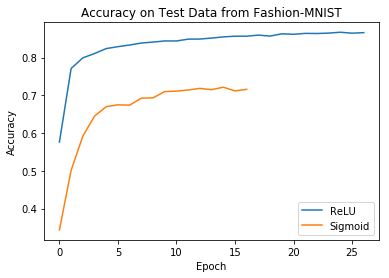

TIME TO TRAIN:
ReLU:		19.770
Sigmoid:	13.149


In [16]:
plt.plot(history.history['acc'], label='ReLU')
plt.plot(history2.history['acc'], label='Sigmoid')
plt.title("Accuracy on Test Data from Fashion-MNIST")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.show()
print("TIME TO TRAIN:\nReLU:\t\t{:.3f}\nSigmoid:\t{:.3f}".format(relu_time, sigmoid_time))

# Problem 2
Using the notation from class today (and from the video) calculate one iteration of backpropagation by hand (or code something to do it for you).  That is, calculate the forward pass and then the backward pass to compute both the output of the network for the current weights, and the gradient (with respect to the Ws and the bs) on a (fully connected) neural network with two hidden layers of 2 neurons each (ReLu activation), two inputs, and a single output layer having a sigmoid activation function. Use the input data $x=(1,-1)$, $y=1$, and assume the current weights are

W^1 = 0.25  0.1
            -0.2   0.9

b^(1) =   0.1
             -0.2

W^(2) =  0.5   0.8
               0.3   0.7

b^(2) =  -0.3
               0.1

W^(3) =  0.1   -0.2

b^(3) = 0.3$

So the structure of the network looks something like this:

            L_1      L_2      L_3
            
    x_0 ----> O ----> O ----> O ----> 

        \  /        \  /           /
       
         / \         / \         /
        
          x_1 ----> O ----> O

where the Os here represent neurons

In [17]:
x = np.array([1,-1])
y = np.array([1])
W1 = np.array([[.25,.1],
               [-.2,.9]])
b1 = np.array([.1, -.2])
W2 = np.array([[.5,.8],
               [.3,.7]])
b2 = np.array([-.3,.1])
W3 = np.array([[.1,-.2]])
b3 = np.array([.3])

In [18]:
def relu(x):
    x[x<0] = 0.
    return x

def Drelu(x):
    x[x<=0] = 0.
    x[x>0] = 1.
    return x

def sigmoid(x):
    return np.exp(x)/(np.exp(x) + 1.)

def Dsigmoid(x):
    return np.exp(x)/((np.exp(x) + 1.)**2)

z1 = W1.dot(x) + b1
a1 = relu(z1)
z2 = W2.dot(a1) + b2
a2 = relu(z2)
z3 = W3.dot(a2) + b3
yhat = sigmoid(z3)

In [19]:
# all of the below things are derivatives of C = .5(yhat - y)^2
# so the first one is dC/dW3
dW3 = (yhat - y)*Dsigmoid(z3)*a2
dW3

array([-0.        , -0.01866382])

In [20]:
db3 = (yhat - y)*Dsigmoid(z3)*1.
db3

array([-0.10665039])

In [27]:
dW2 = (yhat - y)*Dsigmoid(z3)*W3.dot(Drelu(z2))*np.outer(np.ones(2),a1)
dW2

array([[0.00533252, 0.        ],
       [0.00533252, 0.        ]])

In [68]:
db2 = (yhat - y)*Dsigmoid(z3)*W3.dot(Drelu(z2))*np.array([1.,1.])
db2

array([0.02133008, 0.02133008])

In [67]:
dW1 = (yhat - y)*Dsigmoid(z3)*W3.dot(Drelu(z2))*(W2*(Drelu(z1).dot(x)))
dW1

array([[0.01066504, 0.01706406],
       [0.00639902, 0.01493105]])

In [66]:
db1 = (yhat - y)*Dsigmoid(z3)*W3.dot(Drelu(z2))*(W2.dot(Drelu(z1)))
db1

array([0.01066504, 0.00639902])